In [13]:
#### CREDITS: Wencen Wu ####
import numpy as np

#parameters
rad = 10
thk = 5
sep = 5
N = 1000
#n data points,(x1,y1) are the coordinates of the top semi-circle
def generatedata(rad,thk,sep,n,x1 = 0,y1 = 0):
    # center of the top semi-circle
    X1 = x1
    Y1 = y1

    # center of the bottom semi-circle
    X2 = X1 + rad + thk / 2
    Y2 = Y1 - sep
    
    # data points in the top semi-circle
    top = []
    # data points in the bottom semi-circle
    bottom = []
    #label
    point = []
    label = []
    # parameters
    r1 = rad + thk
    r2 = rad
    
    cnt = 1
    while(cnt <= n):
        #uniformed generated points
        x = np.random.uniform(-r1,r1)
        y = np.random.uniform(-r1,r1)
        
        d = x**2 + y**2
        if(d >= r2**2 and d <= r1**2):
            if (y > 0):
                top.append([X1 + x,Y1 + y])
                point.append([X1 + x,Y1 + y])
                label.append(1)
                cnt += 1
            else:
                bottom.append([X2 + x,Y2 + y])
                point.append([X2 + x,Y2 + y])
                label.append(-1)
                cnt += 1
        else:
            continue

    return top,bottom,label,point

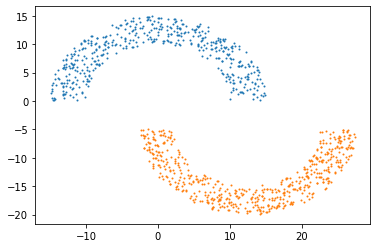

In [14]:
import matplotlib.pyplot as plt
top,bottom,label,point = generatedata(rad,thk,sep,N)

X1 = [i[0] for i in top]
Y1 = [i[1] for i in top]

X2 = [i[0] for i in bottom]
Y2 = [i[1] for i in bottom]

plt.scatter(X1,Y1,s = 1)
plt.scatter(X2,Y2,s = 1)
plt.show()

In [15]:
def Judge(X, y, w):

    n = X.shape[0]

    num = np.sum(X.dot(w) * y > 0)
    return num == n

def PLA(X, y, eta=1, max_step=np.inf):

    n, d = X.shape
    w = np.zeros(d)
    t = 0

    i = 0

    last = 0
    while not(Judge(X, y, w)) and t < max_step:
        if np.sign(X[i, :].dot(w) * y[i]) <= 0:
            t += 1
            w += eta * y[i] * X[i, :]
            last = i
        
        i += 1
        if i == n:
            i = 0
    
    return t, last, w


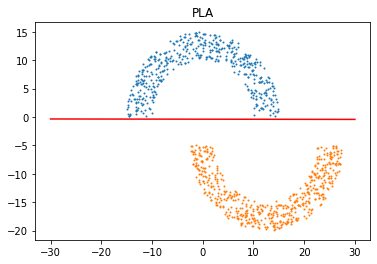

In [21]:

X_treat = np.c_[np.ones(N), point]
#PLA
t, last, w = PLA(X_treat, label)

r = 2 * (rad + thk)
a1 = np.array([-r,r])
b1 = - (w[0] + w[1] * a1) / w[2]


plt.plot(a1, b1, c="red")
plt.title('PLA')
plt.scatter(X1,Y1,s = 1)
plt.scatter(X2,Y2,s = 1)
plt.show()